In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [12]:
data = pd.read_csv('/home/kuba/Downloads/nndb_flat.csv')
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [17]:
data.head()
data = data[['ID','FoodGroup','Descrip','Energy_kcal','Protein_g','Fat_g','Carb_g',
       'Sugar_g', 'Fiber_g']]

In [18]:
corr = data.corr()

Text(0.5, 1.0, 'Correlation between different fearures')

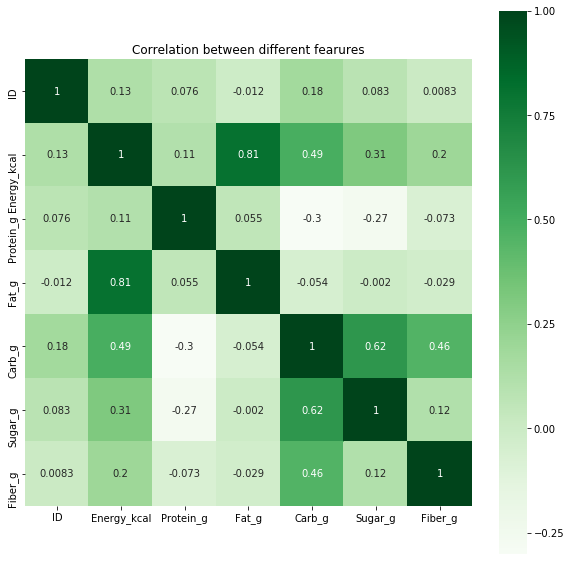

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True , annot=True, cmap='Greens')

plt.title('Correlation between different fearures')

In [27]:
X = np.array(data)
X = X[:,3:] # we got 'Energy_kcal','Protein_g','Fat_g','Carb_g','Sugar_g', 'Fiber_g'

array([[717.0, 0.85, 81.11, 0.06, 0.06, 0.0],
       [717.0, 0.85, 81.11, 0.06, 0.06, 0.0],
       [876.0, 0.28, 99.48, 0.0, 0.0, 0.0],
       ...,
       [269.0, 0.0, 0.0, 73.14, 73.2, 0.0],
       [90.0, 16.1, 1.4, 2.0, 0.0, 0.0],
       [89.0, 19.8, 0.5, 0.0, 0.0, 0.0]], dtype=object)

In [29]:
def Normalize(X): 
    n = X.shape[1]
    for i in range(n): 
        X[:,i] = (X[:,i] -X[:,i].mean())/X[:,i].std()
    return X 

In [38]:
X_norm = Normalize(X) 

In [39]:
from sklearn.decomposition import PCA

In [46]:
PCA().fit_transform(X_norm)

array([[ 2.17434454e+00,  4.24552789e+00, -1.72473570e+00,
         2.08559398e+00,  3.81744753e-01,  3.21199198e-02],
       [ 2.17434454e+00,  4.24552789e+00, -1.72473570e+00,
         2.08559398e+00,  3.81744753e-01,  3.21199198e-02],
       [ 3.00638239e+00,  5.40363914e+00, -1.98349765e+00,
         2.43378856e+00,  4.37121161e-01,  3.64331999e-02],
       ...,
       [ 3.24011213e+00, -2.57474327e+00, -2.12788750e+00,
        -2.43769870e+00,  1.37016787e+00,  8.26151951e-02],
       [-1.43704772e+00, -1.24537240e-01,  7.44308946e-02,
        -2.67784041e-01,  3.08024569e-02, -3.58503280e-03],
       [-1.56050912e+00,  2.11902609e-03,  2.69454417e-01,
        -5.14088331e-01,  7.15239570e-02, -2.90568667e-03]])